In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np # 이미지는 기본적으로 2차원 배열이기 때문
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)
(256, 256)


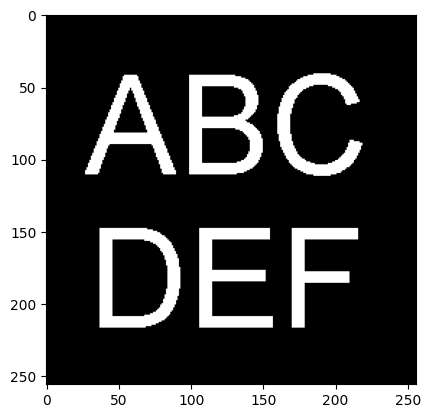

In [3]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/abcdef.bmp')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap = 'gray')

In [4]:
def saturation(val):
  if val > 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

In [5]:
gPoint = np.zeros((gImg.shape[0], gImg.shape[1]), dtype = np.ubyte)

(256, 256, 3)


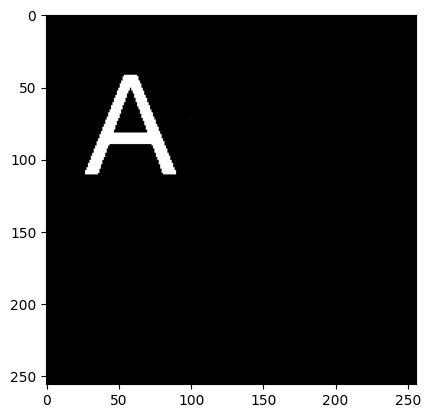

In [6]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/a.bmp')
print(img.shape)
gImg2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gImg2, cmap = 'gray')

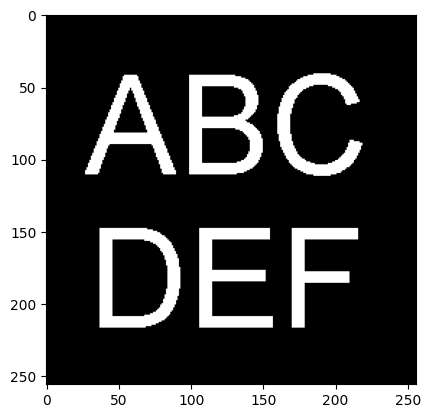

In [9]:
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    # pointVal = np.int32(gImg[h, w]) & np.int32(gImg2[h, w])
    pointVal = np.int32(gImg[h, w]) | np.int32(gImg2[h, w])
    gPoint[h, w] = saturation(pointVal)

plt.imshow(gPoint, cmap='gray')

(256, 256, 3)


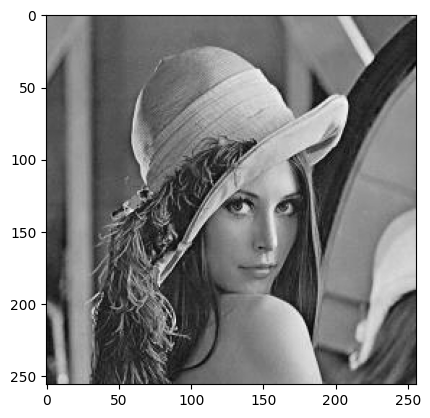

In [12]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/lena256.jpg')
print(img.shape)
gImg2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gImg2, cmap = 'gray')

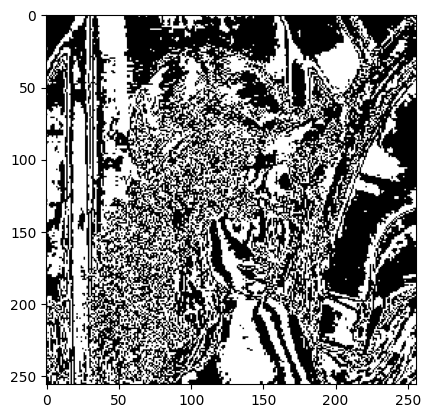

In [21]:
planeNum = 5
planeValue = 1

for i in range(planeNum - 1):
  planeValue *= 2

for h in range(gImg2.shape[0]):
  for w in range(gImg2.shape[1]):
    imValue = gImg2[h, w]
    imValue = (int)(imValue/planeValue);
    if(imValue % 2 == 0):
      imValue = 0
    else:
      imValue = 255
    gPoint[h, w] = imValue & planeValue

plt.imshow(gPoint, cmap = 'gray')

In [22]:
gWaterMarker = gImg2.copy()

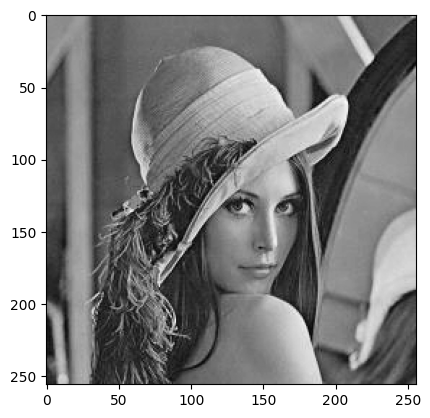

In [23]:
for h in range(gImg2.shape[0]):
  for w in range(gImg2.shape[1]):
    imValue = gImg[h, w]
    if(imValue >= 128):
      if(gWaterMarker[h, w] % 2 == 0):
        gWaterMarker[h, w] += 1
    else:
      if(gWaterMarker[h, w] % 2 == 1):
        gWaterMarker[h, w] -= 1

plt.imshow(gWaterMarker, cmap = 'gray')